In [1]:
import xarray as xr
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib import cm as cmap
from cycler import cycler

In [2]:
# Get latest version dir.
dirs = [os.path.join('../lightning_logs/', d) for d in os.listdir('../lightning_logs/') if os.path.isdir(os.path.join('../lightning_logs/', d))]
log_dir = sorted(dirs, key=lambda x: os.path.getctime(x), reverse=True)[0]
log_dir

'../lightning_logs/version_6'

In [3]:
ds = xr.open_dataset(os.path.join(log_dir, 'predictions.nc'))

In [4]:
ds

<xarray.Dataset>
Dimensions:    (epoch: 2, iter: 86, time: 17520)
Coordinates:
  * time       (time) datetime64[ns] 2007-01-01T00:15:00 ... 2007-12-31T23:45:00
  * epoch      (epoch) int64 0 1
  * iter       (iter) int64 0 1 2 3 4 5 6 7 8 9 ... 77 78 79 80 81 82 83 84 85
Data variables:
    reco       (time) float64 ...
    rb         (time) float64 ...
    reco_pred  (epoch, time) float64 ...
    rb_pred    (epoch, time) float64 ...
    q10        (iter) float32 ...

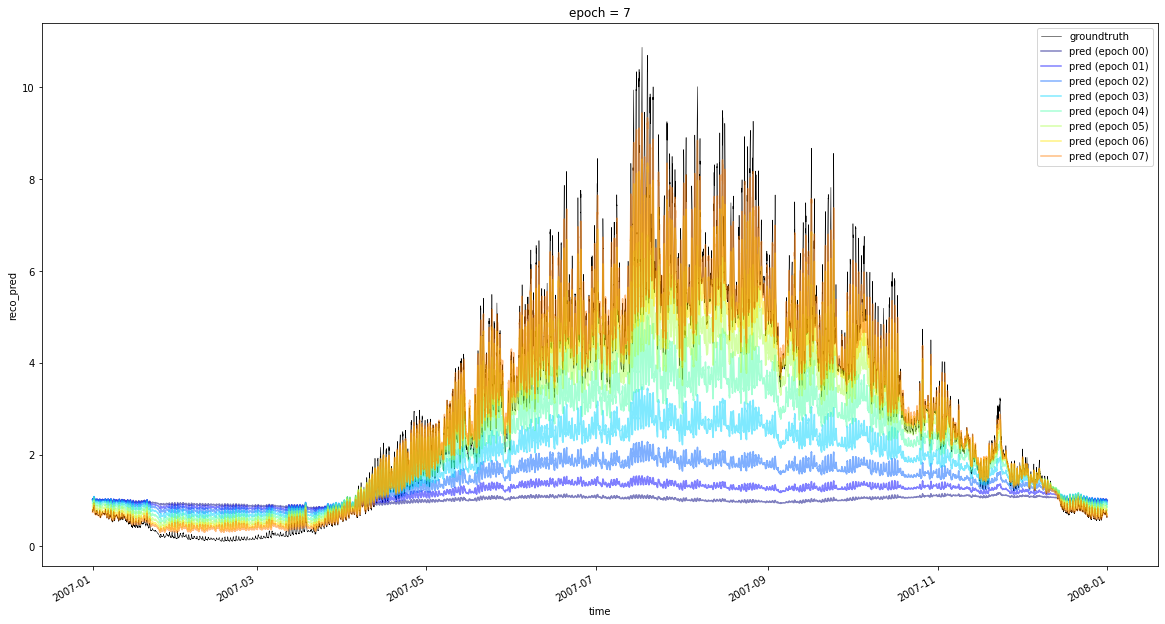

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

ax.set_prop_cycle(cycler(color=cmap.jet(np.linspace(0, 1, 10))))


ds['reco'].plot(color='k', lw=0.5, label='groundtruth')
for i in range(8):
    ds['reco_pred'].isel(epoch=i).plot(alpha=0.5, ax=ax, label=f'pred (epoch {i:02d})')

plt.legend()

Text(0.5, 1.0, 'Q10 estimated')

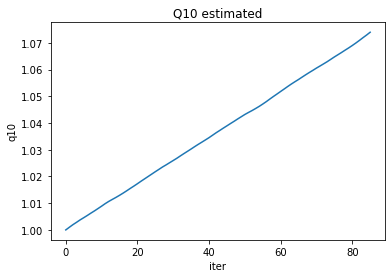

In [6]:
ds.q10.plot()
plt.title('Q10 estimated')